In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats

In [2]:
# Load the clean CSV file created in the data selection file into a Pandas DataFrame
map_data_df = pd.read_csv("timothyrenner-bfro-sightings-data/Bigfoot Clean Data.csv", index_col=0)

#Divide moon data into 8 equal cycle bins (new = 0, waxing crescent = .125, ...)
newmoon = map_data_df["moon_phase"].loc[(map_data_df["moon_phase"]<=0.0625) | (map_data_df["moon_phase"]>0.9375)].count()
waxingcrescent = map_data_df["moon_phase"].loc[(map_data_df["moon_phase"]>0.0625) & (map_data_df["moon_phase"]<=0.1875)].count()
firstquarter = map_data_df["moon_phase"].loc[(map_data_df["moon_phase"]>0.1875) & (map_data_df["moon_phase"]<=0.3125)].count()
waxinggibbous = map_data_df["moon_phase"].loc[(map_data_df["moon_phase"]>0.3125) & (map_data_df["moon_phase"]<=0.4375)].count()
fullmoon = map_data_df["moon_phase"].loc[(map_data_df["moon_phase"]>0.4375) & (map_data_df["moon_phase"]<=0.5625)].count()
waninggibbous = map_data_df["moon_phase"].loc[(map_data_df["moon_phase"]>0.5625) & (map_data_df["moon_phase"]<=0.6875)].count()
thirdquarter = map_data_df["moon_phase"].loc[(map_data_df["moon_phase"]>0.6875) & (map_data_df["moon_phase"]<=0.8125)].count()
waningcrescent = map_data_df["moon_phase"].loc[(map_data_df["moon_phase"]>0.8125) & (map_data_df["moon_phase"]<=0.9375)].count()

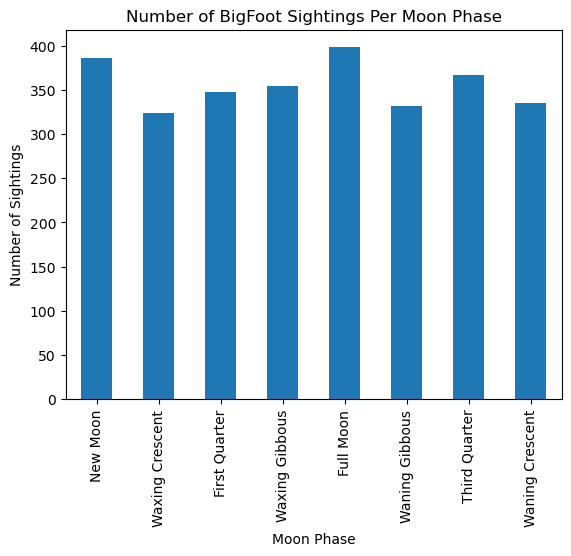

In [4]:
#Define each moon cycle phase
phase = ["New Moon","Waxing Crescent","First Quarter","Waxing Gibbous",
     "Full Moon","Waning Gibbous","Third Quarter","Waning Crescent"]

#Store the count of each moon phase in an array
phase_count = [newmoon,waxingcrescent,firstquarter,waxinggibbous,fullmoon,waninggibbous,thirdquarter,waningcrescent]

#Create a dataframe containing the number of bigfoot observations during each moon cycle
moon_data = pd.Series(phase_count,index = phase)
moon_data_df = pd.DataFrame(moon_data)

#Determine the expected number of sightings per phase (per the null hypothesis)
expected = map_data_df["moon_phase"].count()/8

#Add an expected column to the dataframe and rename the columns
moon_data_df[1] = expected
moon_data_df.columns = ["observed","expected"]

#Plot the BigFoot Sightings per MoonCycle
moon_data_df.plot(y="observed",kind="bar",legend=False,xlabel="Moon Phase",ylabel="Number of Sightings",
                 title="Number of BigFoot Sightings Per Moon Phase")
plt.show()

In [7]:
# The degree of freedom is 8-1 = 7
# With a p-value of 0.05, the confidence level is 1.00-0.05 = 0.95.
critical_value = stats.chi2.ppf(q = 0.95, df = 7)

#Display the critical value
critical_value

14.067140449340169

In [8]:
# Run the chi square test with stats.chisquare()
stats.chisquare(moon_data_df['observed'], moon_data_df['expected'])

Power_divergenceResult(statistic=13.810411537108688, pvalue=0.05465795938952408)